# Testing methods of denoising

## Gaussian and Median

[[0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00531767 0.02815437 0.07653151 0.10680833 0.07653151 0.02815437
  0.00531767]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]]


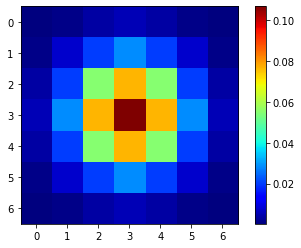

In [1]:
### What is gaussian Kernel #####
import numpy 
from matplotlib import pyplot as plt

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 

gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

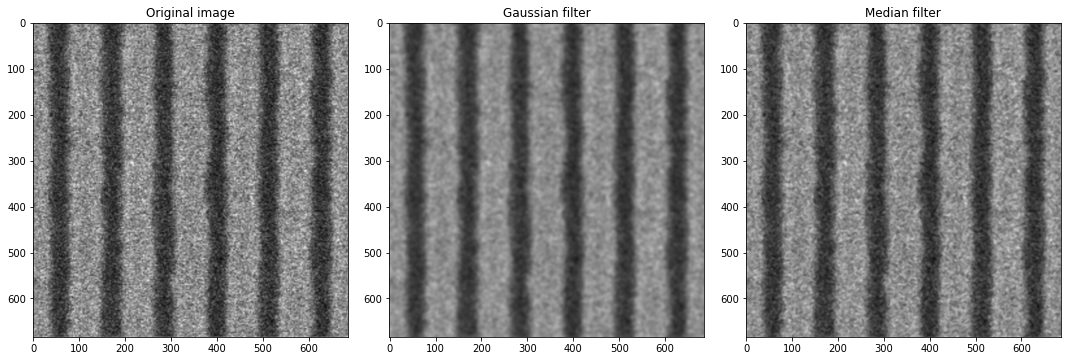

In [2]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,15))
img = img_as_float(io.imread("./data/line_space_noisy.jpg"))
fig.tight_layout()
#Need to convert to float as we will be doing math on the array

ax1.set_title("Original image")
ax1.imshow(img)

from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
#plt.imsave("images/gaussian.jpg", gaussian_img)

ax2.set_title("Gaussian filter")
ax2.imshow(gaussian_img)

median_img = nd.median_filter(img, size=5)
#plt.imsave("images/median.jpg", median_img)

ax3.set_title("Median filter")
ax3.imshow(median_img)



#### Conclusion so far:

* Gaussian filter may produce a "clean image" however, the image is blury and thus, we lose information.
* Median filter seems less blury than Gaussian however, the image is not fully denoised. (increasing window size will make it more blury and clean at the same time)

## Non-local means

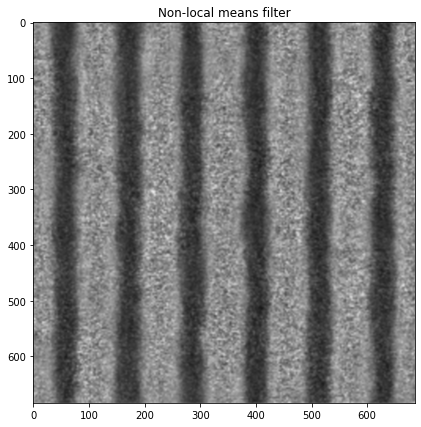

In [4]:

sigma_est = np.mean(estimate_sigma(img, multichannel=True))


denoise_img = denoise_nl_means(img, h=14.15 * sigma_est, fast_mode=True,
                               patch_size=80, patch_distance=20, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)"
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)
plt.figure(figsize=(7,7))
plt.title("Non-local means filter")
plt.imshow(denoise_img)
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')

#### Conclusion for Non-local means:

* Non-local means appears to have better results than both Gaussian and Median filter. It depends on the parameters given but still for this case we get a bit blury image. Also it is slow if we turn fast_mode = False. Can we do better?

# OpenCV approach


#### Here we show some of open cv denoise capabilities 

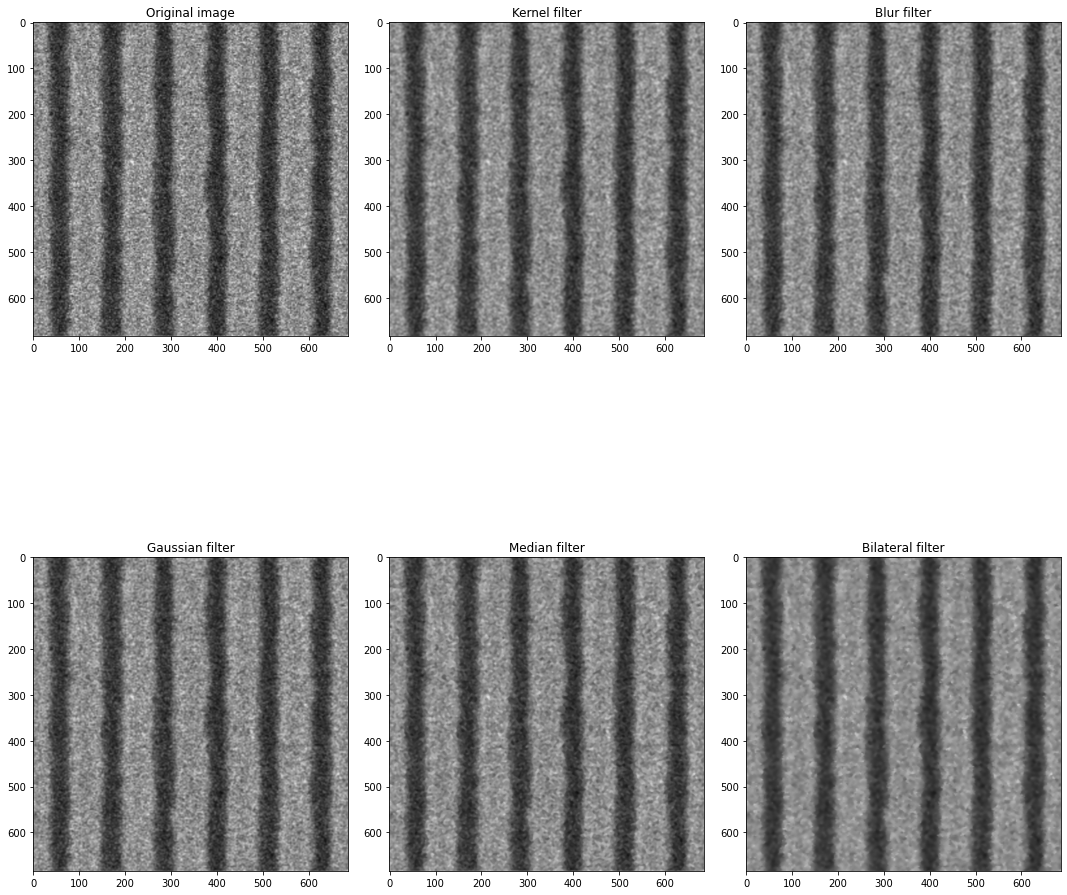

In [2]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
import cv2

fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15,15))

img = cv2.imread("./data/line_space_noisy.jpg",1)
fig.tight_layout()
#Generate kernel
kernel_dim_size = 5 #size of the kernel
kernel = np.ones((kernel_dim_size,kernel_dim_size), np.float32)/kernel_dim_size**2   # normalizing it by dividing by kernel size**2 (we dont want to change the energy of the image)
filt_2D = cv2.filter2D(img,-1,kernel)

axs[0,0].set_title("Original image")
axs[0,0].imshow(img)



axs[0,1].set_title("Kernel filter")
axs[0,1].imshow(filt_2D)

blur = cv2.blur(img,(5,5))
axs[0,2].set_title("Blur filter")
axs[0,2].imshow(blur)


gaussian_fill = cv2.GaussianBlur(img,(5,5),0)
axs[1,0].set_title("Gaussian filter")
axs[1,0].imshow(gaussian_fill)


median_fill = cv2.medianBlur(img,5)
axs[1,1].set_title("Median filter")
axs[1,1].imshow(median_fill)


bilateral_fill = cv2.bilateralFilter(img,11,120,120)
axs[1,2].set_title("Bilateral filter")
axs[1,2].imshow(bilateral_fill)

#### BONUS 
## EDGE DETECTION

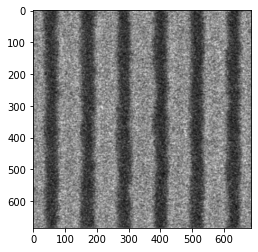

In [7]:
edges = cv2.Canny(img,110,180)   #Image, min and max values

plt.imshow(img)


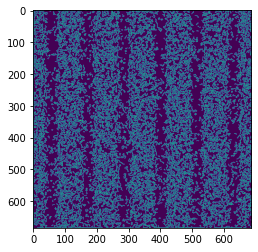

In [8]:
plt.imshow(edges)